# Binomial Option Pricing

In [1]:
import numpy as np

# S: stock price
# K: strike of the option
# r: interest rate
# Sigma: volatility of the option
# T: life remaining of the option

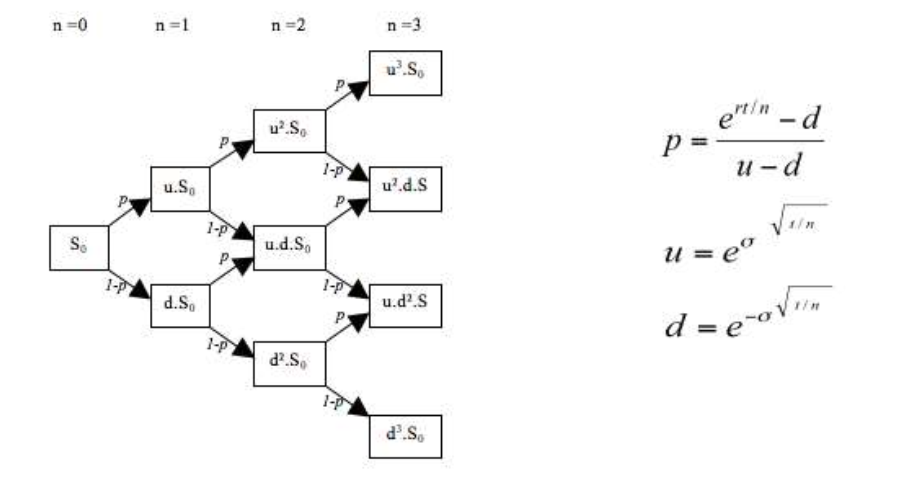

In [2]:
from IPython.display import Image
Image(filename='Binomial Tree.png')

In [3]:
for x in range(10):
    print(x)

0
1
2
3
4
5
6
7
8
9


In [4]:
for b in range(10,-1,-1):
    print(b)

10
9
8
7
6
5
4
3
2
1
0


In [5]:
n=10
ns1 =  np.asarray([0 for i in range(n + 1)]) # assign 0.0 for end nodes
print(ns1)    


 
  

[0 0 0 0 0 0 0 0 0 0 0]


In [6]:
S = 100
K = 100
r = 0.05
sigma = 0.25
t = 1
n=10

In [7]:

deltaT = float(t) / n
 

u = np.exp(sigma * np.sqrt(deltaT))
d = 1.0 / u
 

ns1 =  np.asarray([0.0 for i in range(n + 1)]) # assign 0.0 for each node

print(ns1)


ns2 = np.asarray([(S * u**j * d**(n - j)) for j in range(n + 1)])
    
print(ns2)

ns3 =np.asarray( [float(K) for i in range(n + 1)])

print(ns3)
 

   

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[  45.35864428   53.12856091   62.22946099   72.88934141   85.37525485
  100.          117.12995782  137.1942702   160.69559082  188.22267775
  220.46514306]
[ 100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.]


In [8]:

    
 
# probability of up and down
    
a = np.exp(r * deltaT) 
    
p = (a - d)/ (u - d) # probability of up
    
oneMinusP = 1.0 - p # probability of down
 
   

ns1[:] = np.maximum(ns2-ns3, 0.0)
print(ns1[:])
    
   



[   0.            0.            0.            0.            0.            0.
   17.12995782   37.1942702    60.69559082   88.22267775  120.46514306]


In [9]:
print(ns1[0:])

[   0.            0.            0.            0.            0.            0.
   17.12995782   37.1942702    60.69559082   88.22267775  120.46514306]


In [10]:
print(ns1[1:])

[   0.            0.            0.            0.            0.
   17.12995782   37.1942702    60.69559082   88.22267775  120.46514306]


In [11]:
print(ns1[:-1])

[  0.           0.           0.           0.           0.           0.
  17.12995782  37.1942702   60.69559082  88.22267775]


In [12]:
S = 100
K = 100
r = 0.05
sigma = 0.25
t = 1
n=10
     

In [13]:
def BinomialTree(type,S, K, r, sigma, t, n=1000,american="false"):
          
    # time bucket for each node i.e. a small change of time for each node
    deltaT = float(t) / n
 
    # up and down ticks
    u = np.exp(sigma * np.sqrt(deltaT))
    d = 1.0 / u
 
    # node inititation of the array
    ns1 =  np.asarray([0.0 for i in range(n + 1)]) # assign 0.0 for each node
        
    # expiration node values of stock tree distribution
    ns2 = np.asarray([(S * u**j * d**(n - j)) for j in range(n + 1)])
    
    # strikes for expiration
    ns3 =np.asarray( [float(K) for i in range(n + 1)])
    
 
    # risk neutral probability of up and down
    
    a = np.exp(r * deltaT) 
    
    p = (a - d)/ (u - d) # probability of up
    
    oneMinusP = 1.0 - p # probability of down
 
   
    # Compute the ends
    if type =="C":
        ns1[:] = np.maximum(ns2-ns3, 0.0)
    else:
        ns1[:] = np.maximum(-ns2+ns3, 0.0)
    
   

    # backward calculation of the option prices
    for i in range(n-1, -1, -1):
       
       ns1[:-1]=np.exp(-r * deltaT) * (p * ns1[1:] + oneMinusP * ns1[:-1])
       ns2[:]=ns2[:]*u
           
       if american=='true':
           #the option is worth more alive or dead
           if type =="C":
                ns1[:]=np.maximum(ns1[:],ns2[:]-ns3[:])
           else:
                ns1[:]=np.maximum(ns1[:],-ns2[:]+ns3[:])
                
    # The initial value
    return ns1[0]

print(BinomialTree("P",105, 100, 0.05, 0.25, 1, n=1000,american="false"))

5.7767270576


In [14]:
print(BinomialTree("P", 105,100,0.05,0.25,1,n=1000,american="true"))

6.13712051424


In [15]:
print(BinomialTree("C", 105,100,0.05,0.25,1,n=1000,american="true"))

15.6537846075


In [16]:
print(BinomialTree("C", 105,100,0.05,0.25,1,n=1000,american="false"))

15.6537846075
